# Hypothetical Problem:

#### I have chosen to work for a financial services (Banking or Non-Banking Financial institution) that provides lending services to its customers. As a data scientist, I have been given the task of predicting whether a customer will be completing the E-signing of the loan they applied for, i.e. whether their loan application will be accepted or not, with the help of data collected on the customers, such as their age, income, employment status, existing debt, risk scores etc.
#### Importance :  It is important for banks and other financial institutions to pick the right customers when extending loans. When targetting customers for offering lending services, promotional rates and additional tertiary services that the bank also indulges in, having a better idea of which customers may ultimately be approved for a loan after thorough checks and procedural flow gives an added advantage to the financial service marketing wing of the banks.
#### Benefits from predicting which customers are likely to be able to complete the loan e-signing procedure : Lending is one of the most vital sources of income for a financial institution and the most heavily targetted for expansion, an inability to target the right customers in a timely manner may lead to extra costs incurred in marketting the product for the banks and a knowledge of the right customers based on a few analysed metrics can significantly reduce these costs as well as increase penetration in the market. A rudimentary analysis can also help in building backwards analysis of which customer segments to target and how, what interest rates to choose based on a customer's vulnerability, income stability and other obligations.
#### The relevant data may be collected from the information filled out by borrowers while applying for loans or via online forms. For our purpose, we have taken a credit Financial dataset from the opensource website kaggle (https://www.kaggle.com/datasets/yashpaloswal/esigning-of-loanbased-on-financial-history/data)
#### Formulating the problem as a machine learning task : The problem at hand is a classification task to predict whether a loan applicant will be able to complete the e-signing process for loan approval. To do this I will clean the dataset chosen (given), run data preprocessing tasks on it to make it more comfortable for my machine learning model to learn from, I will be running a neural network algorithm and tweaking the various parameters used in building and training the model to get the best results for our task at hand.

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.compose
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Loading the dataset

In [ ]:
df = pd.read_csv("Financial-Data.csv")
df.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


#### The Entry_id column is irrelevant to our problem here as it only serves as a numerical list, we will remove this column from the entire dataframe to not confuse our model later on

In [ ]:
df = df.drop(['Entry_id'], axis=1)
df.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


#### We will also address the problem of duplicates within our dataset now. Identifying and eliminating duplicates before performing the split.

In [ ]:
print(df.duplicated().sum())

0


#### No duplicates, we move on.

## Splitting the dataset into Training, Validation and Test sets to avoid data leakage

In [ ]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.20,random_state=42)

print("df size:", df.shape)
print("df_train size:", df_train.shape)
print("df_test size:", df_test.shape)

df size: (17908, 20)
df_train size: (14326, 20)
df_test size: (3582, 20)


#### (??) Test size has been kept at 0.2 i.e. 20% of the entire dataset, this seems reasonable for the given dataset.
#### Going with test size over 20% seems suboptimal as it will reduce the training dataset size and given that our neural network would also require a validation split at the time of compilation and training of the model, it seems optimal to keep the test size at 20%.
#### Another important point to note is that we will be validating our result with by performing validation split while fitting the model, eliminating the need for an extra validation set to be held out befoe training.
#### We have also used random_state = 42 as our random number generator seed as it is a popular seed to select from, the random_state has been assigned to keep the results of the split constant over a number of trial runs.

# Data Exploration

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14326 entries, 2698 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   14326 non-null  int64  
 1   pay_schedule          14326 non-null  object 
 2   home_owner            14326 non-null  int64  
 3   income                14326 non-null  int64  
 4   months_employed       14326 non-null  int64  
 5   years_employed        14326 non-null  int64  
 6   current_address_year  14326 non-null  int64  
 7   personal_account_m    14326 non-null  int64  
 8   personal_account_y    14326 non-null  int64  
 9   has_debt              14326 non-null  int64  
 10  amount_requested      14326 non-null  int64  
 11  risk_score            14326 non-null  int64  
 12  risk_score_2          14326 non-null  float64
 13  risk_score_3          14326 non-null  float64
 14  risk_score_4          14326 non-null  float64
 15  risk_score_5    

### Checking the distribution of prospective target label.

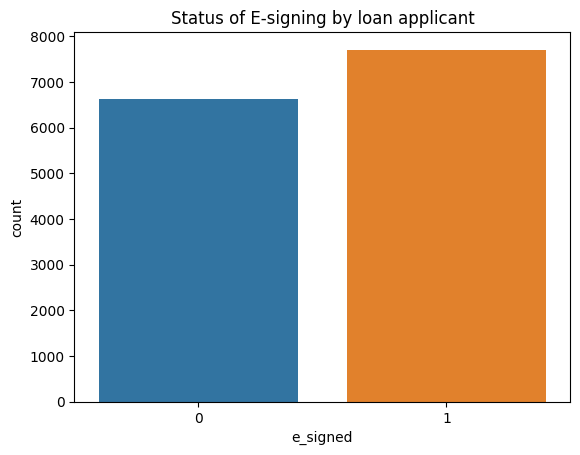

In [ ]:
sns.countplot(x='e_signed', data=df_train)
plt.title("Status of E-signing by loan applicant")
plt.show()

### Checking to see feature correlations and correlations with target label by the help of a correlation heatmap.

In [ ]:
df_train_only_numeric = df_train.drop(['pay_schedule'], axis=1)
df_corr = df_train_only_numeric.corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.3f}'
    )
)
fig.show()

### Checking the distribution of unique values among the feature columns and proposed target label.

In [ ]:
df_train.describe().T.style.background_gradient(cmap = "magma")

,count,mean,std,min,25%,50%,75%,max
age,14326.000000,42.946391,11.859394,18.000000,34.000000,42.000000,51.000000,96.000000
home_owner,14326.000000,0.425450,0.494428,0.000000,0.000000,0.000000,1.000000,1.000000
income,14326.000000,3666.303504,1511.624121,905.000000,2580.000000,3260.000000,4680.000000,9985.000000
months_employed,14326.000000,1.175485,2.393546,0.000000,0.000000,0.000000,1.000000,11.000000
years_employed,14326.000000,3.525339,2.263487,0.000000,2.000000,3.000000,5.000000,16.000000
current_address_year,14326.000000,3.585997,2.760119,0.000000,2.000000,3.000000,5.000000,12.000000
personal_account_m,14326.000000,3.426358,2.219347,0.000000,2.000000,2.000000,5.000000,11.000000
personal_account_y,14326.000000,3.503769,1.956335,0.000000,2.000000,3.000000,4.000000,15.000000
has_debt,14326.000000,0.792336,0.405649,0.000000,1.000000,1.000000,1.000000,1.000000
amount_requested,14326.000000,953.581600,695.595781,350.000000,600.000000,700.000000,1100.000000,10200.000000


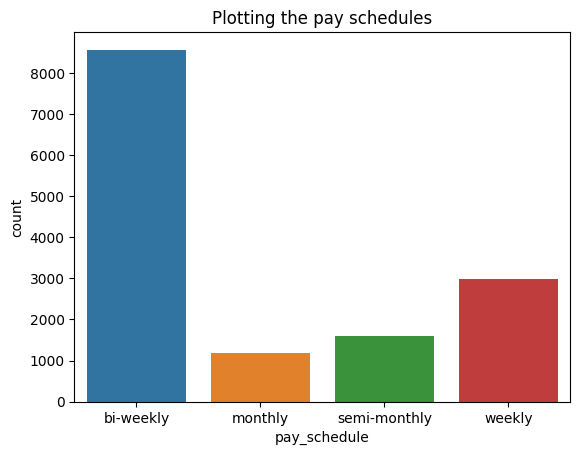

In [ ]:
sns.countplot(x='pay_schedule', data=df_train)
plt.title("Plotting the pay schedules")
plt.show()

#### Looking at the info an visualisations from our data, we can already deduce/ assume a few things:
##### 1. The column 'Age' contains values in terms of years (how old a person is in years), we can see from the discription table that all of its values are valid.
##### 2. 'ext_quality_score' and 'ext_quality_score_2'; and 'risk_score', 'risk_score_2', 'risk_score_3', 'risk_score_4' and 'risk_score_5' are confidential measures/ scores used by the institution to score prospective loan applicants.
##### 3. The column 'pay_schedule' is categorical and will be encoded using OneHotEncoder as they might have a bearing on the ability to pay the loan.
##### 4. The column 'months_employed' and 'years_employed' intrinsically depict the same feature i.e. employment length, in order to simplify our dataframe we will merge the two columns by applying multiplicative transformation to the column 'years_employed'. Similar transformation will be applied to columns 'personal_account_m' and 'personal_account_y'.
##### 5. From the correlation heatmap, we can see that the feature 'risk_score_4' has very little correlation to our proposed target label, 'e_signed' and therefore we will drop this feature.
##### 6. For the columns 'income','amount_requested','risk_score','age', 'inquiries_last_month', 'employment_months' and 'personal_account_months', we will apply scaling by using the standard scaler from the sklearn library.
##### 7. 'e_signed' will be our target label for running a classification task through our model on the present dataset. It gives us the status of completion of e-signing of the loan applied by the loan applicant; '0' means the loan applicant does not complete the process and '1' refers to the loan applicant having finished the e-signeing process. Inability to complete the e-signing process suggests that the application falls short of the required criteria by the bank's lending department.

### Dropping 'risk_score_4' from the training dataset.

In [ ]:
df_train = df_train.drop(['risk_score_4'], axis=1)

### Applying similar transformation to our test set

In [ ]:
df_test = df_test.drop(['risk_score_4'], axis=1)

### Combining the columns 'months_employed' and 'years_employed' and the columns 'personal_account_m' and 'personal_account_y':

In [ ]:
df_train['employment_months'] = (df_train.months_employed + (df_train.years_employed * 12))
df_train = df_train.drop(['months_employed', 'years_employed'], axis=1)
df_train['personal_account_months'] = (df_train.personal_account_m + (df_train.personal_account_y * 12))
df_train = df_train.drop(['personal_account_m', 'personal_account_y'], axis=1)

### Applying similar transformation to our test set

In [ ]:
df_test['employment_months'] = (df_test.months_employed + (df_test.years_employed * 12))
df_test = df_test.drop(['months_employed', 'years_employed'], axis=1)
df_test['personal_account_months'] = (df_test.personal_account_m + (df_test.personal_account_y * 12))
df_test = df_test.drop(['personal_account_m', 'personal_account_y'], axis=1)

# Splitting away target labels

In [ ]:
X_train = df_train.drop(['e_signed'], axis = 1)
y_train = df_train['e_signed']
X_test = df_test.drop(['e_signed'], axis = 1)
y_test = df_test['e_signed']

# Feature Engineering

## Scaling the columns which require being brought down to scale using standard scaler.

In [ ]:
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train.loc[:,['income','amount_requested','risk_score','age', 'inquiries_last_month', 'employment_months', 'personal_account_months']])

X_train.loc[:,['income','amount_requested','risk_score','age', 'inquiries_last_month', 'employment_months', 'personal_account_months']] = scaler.transform(
    X_train.loc[:,['income','amount_requested','risk_score','age', 'inquiries_last_month', 'employment_months', 'personal_account_months']])

X_test.loc[:,['income','amount_requested','risk_score','age', 'inquiries_last_month', 'employment_months', 'personal_account_months']] = scaler.transform(
    X_test.loc[:,['income','amount_requested','risk_score','age', 'inquiries_last_month', 'employment_months', 'personal_account_months']])


In [ ]:
X_train.head()

,age,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,employment_months,personal_account_months
2698,2.023783,bi-weekly,1,4.695776,1,1,0.862600,2.052927,0.667077,0.906873,0.641791,0.628218,0.428218,1.909792,2.275413,3.696583
7514,4.131890,bi-weekly,0,2.117002,5,1,0.718833,3.300977,0.631218,0.966399,0.837886,0.694489,0.594489,5.183722,2.238111,1.160555
12650,4.637836,bi-weekly,0,1.759758,1,1,0.575067,2.727461,0.672894,0.955221,0.791295,0.760892,0.560892,5.729376,2.685733,3.696583
5094,3.288647,bi-weekly,0,2.064077,1,1,3.737933,4.959612,0.749875,0.956253,0.727249,0.699007,0.799007,2.182620,1.715885,3.954484
5018,4.384863,monthly,1,2.083924,1,1,1.725200,2.163720,0.615360,0.837403,0.462709,0.417729,0.517729,1.364137,1.380169,1.633374


## Encoding Categorical Attributes using ColumnTransformer.

In [ ]:
ct = sklearn.compose.ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore'),
                                        ['pay_schedule'])],
                                       remainder='passthrough')
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(14326, 19)
(3582, 19)


##### Storing feature names in a separate list:

In [ ]:
f_name = ct.get_feature_names_out()
print(f_name)

['ohe__pay_schedule_bi-weekly' 'ohe__pay_schedule_monthly'
 'ohe__pay_schedule_semi-monthly' 'ohe__pay_schedule_weekly'
 'remainder__age' 'remainder__home_owner' 'remainder__income'
 'remainder__current_address_year' 'remainder__has_debt'
 'remainder__amount_requested' 'remainder__risk_score'
 'remainder__risk_score_2' 'remainder__risk_score_3'
 'remainder__risk_score_5' 'remainder__ext_quality_score'
 'remainder__ext_quality_score_2' 'remainder__inquiries_last_month'
 'remainder__employment_months' 'remainder__personal_account_months']


#### Our training dataset is now ready and we have also transformed the test dataset to the best of our ability, by learning from the training dataset and applying similar transformations on test set.

# Designing a Neural Network Model

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(20, input_dim = len(X_train[0, :]), activation = 'swish'))
model.add(tf.keras.layers.Dense(16, activation = 'swish'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(12, activation = 'swish'))
model.add(tf.keras.layers.Dense(8, activation = 'swish'))
model.add(tf.keras.layers.Dense(6, activation = 'swish'))
model.add(tf.keras.layers.Dense(4, activation = 'swish'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 20)                400       
                                                                 
 dense_71 (Dense)            (None, 16)                336       
                                                                 
 batch_normalization_11 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dense_72 (Dense)            (None, 12)                204       
                                                                 
 dense_73 (Dense)            (None, 8)                 104       
                                                                 
 dense_74 (Dense)            (None, 6)                 54        
                                                     

# Compiling and Training the model

## Results of parameter tweaking:

### The following picture contains a table of all the parameter tweaks applied prior to settling for the current model and the results of those tweaks:
### The optimizer 'adam' was switched for 'adagrad' and 'adamw' while tweaking the hyperparameters, however with no significant change in the accuracy scores. Only a limited number of significant parameter tweaks are included in the table below.

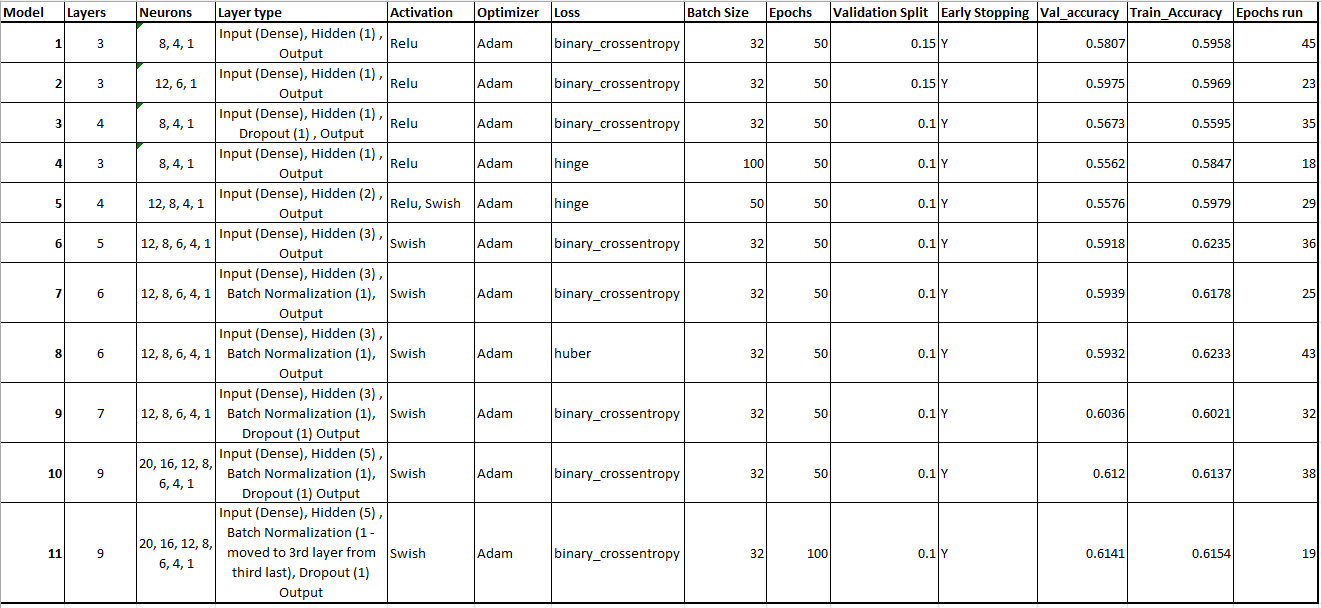

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

callback_es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[callback_es])

Epoch 1/100
403/403 [==============================] - 2s 3ms/step - loss: 0.6851 - accuracy: 0.5449 - val_loss: 0.6822 - val_accuracy: 0.5590
Epoch 2/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6747 - accuracy: 0.5754 - val_loss: 0.6723 - val_accuracy: 0.5708
Epoch 3/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6697 - accuracy: 0.5823 - val_loss: 0.6782 - val_accuracy: 0.5736
Epoch 4/100
403/403 [==============================] - 1s 3ms/step - loss: 0.6647 - accuracy: 0.5882 - val_loss: 0.6729 - val_accuracy: 0.5715
Epoch 5/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6623 - accuracy: 0.6002 - val_loss: 0.6643 - val_accuracy: 0.5848
Epoch 6/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6584 - accuracy: 0.6028 - val_loss: 0.6637 - val_accuracy: 0.5834
Epoch 7/100
403/403 [==============================] - 1s 2ms/step - loss: 0.6570 - accuracy: 0.6030 - val_loss: 0.6584 - val_accuracy: 0.5994

### Checking the Learning Curve of the model:

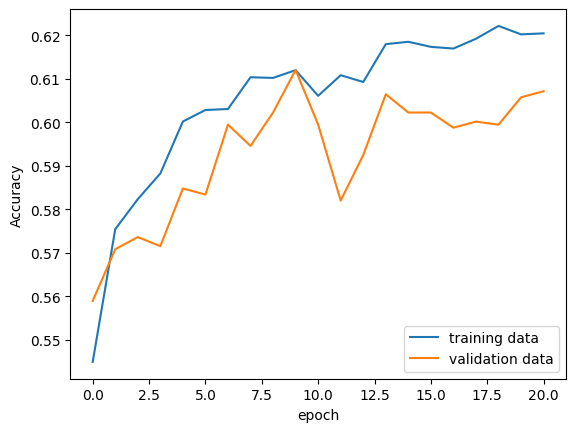

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc= 'lower right')
# plt.plot(history.history['cosine_proximity'])
plt.show()

##### We can see from the learning curve of our model that the accuracy in predicting training and validation data reached an intersection point at 9th and 10th epoch with relatively high accuracy of predictions.

# Testing the model:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

112/112 - 0s - loss: 0.6396 - accuracy: 0.6212 - 123ms/epoch - 1ms/step

Test accuracy: 0.6211613416671753


In [ ]:
y_pred = model.predict(X_test)

112/112 [==============================] - 0s 1ms/step


### Additionally checking the Classification report for our model:

In [ ]:
clf_report = sklearn.metrics.classification_report(y_test, y_pred.round())
print(clf_report)

              precision    recall  f1-score   support

           0       0.62      0.46      0.53      1652
           1       0.62      0.76      0.68      1930

    accuracy                           0.62      3582
   macro avg       0.62      0.61      0.61      3582
weighted avg       0.62      0.62      0.61      3582



##### Looking at the F1 score gives us more confidence in our predictive model as it takes into account important metrics such as precision and recall and gives a more balanced feedback on a binary classification model with imbalanced classes.

### Visual Representation using a Confusion Matrix

<Axes: >

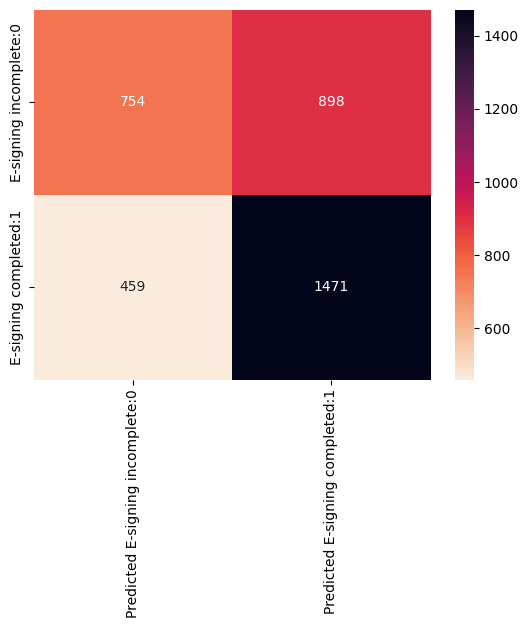

In [ ]:
c_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred.round())
c_matrix_data_view = pd.DataFrame(data=c_matrix, columns=['Predicted E-signing incomplete:0', 'Predicted E-signing completed:1'],
                                  index=['E-signing incomplete:0', 'E-signing completed:1'])
sns.heatmap(c_matrix_data_view, annot=True, fmt='d', cmap='rocket_r')

# Discussion:

### Strengths of the solution used:

#### We have made some general and some specific assumptions with our dataset in the data exploration, cleaning and preprocessing phase:
#### 1) As our neural network model has worked exceptionally fast for its computational ability, our model can be applied in real world situations for financial institutions to implement and run similar or larger datasets on it. Real time information provided by existing customers in bulk can be used to drive targetted marketing by running the model on new potential customers.
#### 2) Our model gies a fairly decent output in terms of predicting the class of customers which may be able to complete the e-signing process, as evident by the confusion matrix represented above and a higher recall for the class shown in the classification report. This is just as well, as the primary motive for our analysis is to improve the targetting of customers by our various marketing channels.
#### 3) By tweaking the feature columns further or reducing and adding more relevant features to our dataset, the predictive power may be improved further.

### Weaknesses of the solution used:


#### 1) Our model is unable to give back feature importances to target and the best guess that the analytics team could make is based on the correlation matrix drawn out for the dataset at the beginning.
#### 2) Our model gives poor recall score in predicting the negative class '0', i.e. 'E-signing incomplete' (0.46). This could be an issue we might want to sort as we would like to keep the targetting of customers very focussed and the marketing budgets at a minimum.
#### 3) Simpler supervised learning models may also be able to give similar performance on the dataset as it is relatively small and with a limited umber of features. Supervised learning gradient boosting models like LightGBM can also handle categorical variables without the need for encoding them and provide feature importances after the model is finished training.

## Recommendations:

#### I would recommend using this model in real world scenarios for financial institutions to target and fix the following issues:
#### 1) Borrowing rates offered to various customer segments based on the feature space (Income, Age, Employment status, past debt history etc.).
#### 2) I would also recommend to use the model to determine a predictive marketing strategy which is focused on customers who are most likely to be approved by the bank's lending department, this translates into the increased revenue for the bank as well as a satisfactory experience for the customers of the bank.
#### 3) The model may be improved by adding additional features which are important while processing a loan application and could be collected from the customers by simple online forms.
#### 4) The model can also be improved by combining the various risk scores provided to us, as the scores remained confidential and their mathematical background unclear, we have not explored combining them to make a stronger predictive feature, however the same could be done were we aware of the calculations undertaken.